## An experiment to investigate the effect of image noise on ice cream texture

# Vanilla vs. Cherry Garcia



## Import necessary modules

In [1]:
import os, copy
import matplotlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Load in pre-made functions

In [2]:
def normalize(image):
    image = (image - np.min(image))/(np.max(image)-np.min(image))
    return image

def load_data():
    vanilla = mpimg.imread(r'.\Vanilla.JPG')     
    vanilla = rgb2gray(vanilla) 
    cherry_garcia = mpimg.imread(r'.\Cherry Garcia.JPG')     
    cherry_garcia = rgb2gray(cherry_garcia) 
    return normalize(vanilla), normalize(cherry_garcia)


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


def plot_image(image, noisy,name='',bins=50):
    image, noisy = copy.deepcopy(image), copy.deepcopy(noisy)
    plt.subplot(1,2,2)
    plt.hist(noisy.flatten(),bins=bins)
    plt.xticks(np.arange(0,1.2,0.2))
    plt.title('Noisy ' + name)
    plt.subplot(1,2,1)
    plt.hist(image.flatten(),bins=bins)
    plt.xticks(np.arange(0,1.2,0.2))
    plt.title(name)
    plt.tight_layout()
    plt.show()
    return None

## Load in image data

Let's load in a closeup photo of the two competitors: Vanilla ice cream and Cherry Garcia ice cream

In [3]:
vanilla, cherry_garcia = load_data()

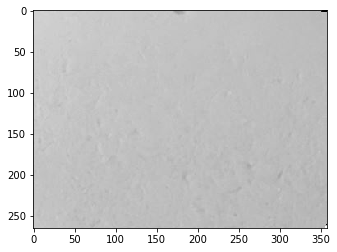

In [4]:
plt.imshow(vanilla,cmap='gray')

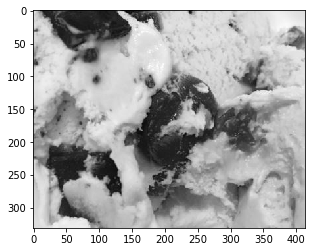

In [5]:
plt.imshow(cherry_garcia,cmap='gray')

## Add noise of your choosing

Now let's add noise to the two images, starting small, look at the images, then investigate the impact of the noise on the image histograms.

As you add noise, what happens to the histograms? What is the difference between the vanilla and Cherry Garcia images?

(hint: keep it realistic - don't make the images too noise)

In [6]:
std_noise = .00  #start with 0, then run the rest of this notebook. Then come back here and try 0.01, 0.02, 0.04, etc.
vanilla, cherry_garcia = load_data()

In [7]:
noisy_vanilla = vanilla + np.random.normal(0,std_noise,vanilla.shape)
noisy_cherry_garcia = cherry_garcia + np.random.normal(0,std_noise,cherry_garcia.shape)

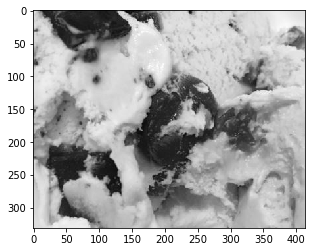

In [8]:
plt.imshow(noisy_cherry_garcia,cmap='gray')

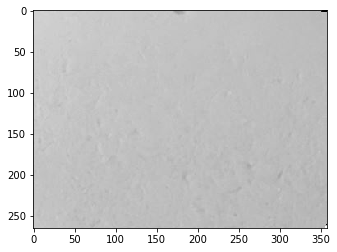

In [9]:
plt.imshow(noisy_vanilla,cmap='gray')

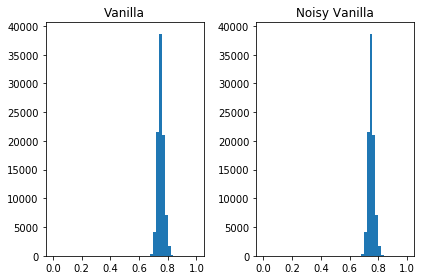

In [10]:
plot_image(vanilla,noisy_vanilla,'Vanilla',bins=50)

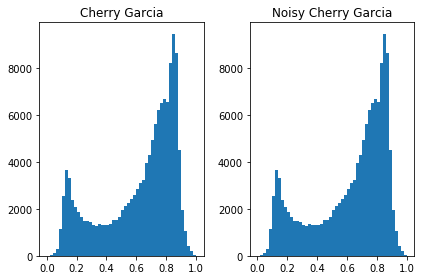

In [11]:
plot_image(cherry_garcia,noisy_cherry_garcia,'Cherry Garcia',bins=50)